## <center> Universidade Federal do Ceará & SiDi - Residência em Segurança da Informação <center>
    
    Grupo 2 - IoT
    Tarefa: Exploração
    Equipe: Davyson Ribeiro, Erik Jhones Freitas, Juliana Lima
    Matrículas: 543043, 543036, 543037

In [1]:
#Bibliotecas
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import imblearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score

In [3]:
#Ignorando avisos
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Formatação
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold= 15)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

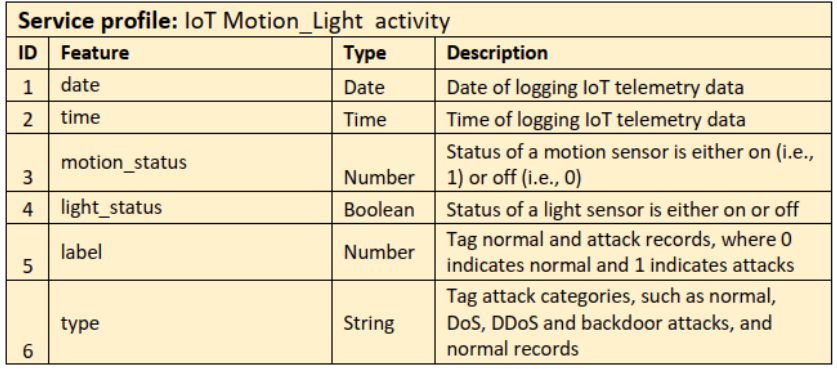

In [5]:
Train_Test_IoT_Motion_Light = pd.read_csv('../datasets/Train_Test_IoT_dataset/Train_Test_IoT_Motion_Light.csv')
Train_Test_IoT_Motion_Light

,ts,date,time,motion_status,light_status,label,type
0,1556246497,25-Apr-19,19:41:37,0,off,1,ddos
1,1556246502,25-Apr-19,19:41:42,1,on,1,ddos
2,1556246503,25-Apr-19,19:41:43,0,off,1,ddos
3,1556246508,25-Apr-19,19:41:48,1,on,1,ddos
4,1556246508,25-Apr-19,19:41:48,0,off,1,ddos
...,...,...,...,...,...,...,...
59483,1554160073,1-Apr-19,16:07:53,0,off,0,normal
59484,1554160073,1-Apr-19,16:07:53,1,on,0,normal
59485,1554160074,1-Apr-19,16:07:54,0,off,0,normal
59486,1554160075,1-Apr-19,16:07:55,0,off,0,normal


In [6]:
Train_Test_IoT_Motion_Light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59488 entries, 0 to 59487
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ts             59488 non-null  int64 
 1   date           59488 non-null  object
 2   time           59488 non-null  object
 3   motion_status  59488 non-null  int64 
 4   light_status   59488 non-null  object
 5   label          59488 non-null  int64 
 6   type           59488 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.2+ MB


In [7]:
Train_Test_IoT_Motion_Light['light_status'].unique()

array([' off', ' on'], dtype=object)

In [8]:
Train_Test_IoT_Motion_Light.light_status[Train_Test_IoT_Motion_Light.light_status == ' off'] = 'off'
Train_Test_IoT_Motion_Light.light_status[Train_Test_IoT_Motion_Light.light_status == ' on'] = 'on'

In [9]:
Train_Test_IoT_Motion_Light['light_status'].unique()

array(['off', 'on'], dtype=object)

## Processamento dos Dados
#### Dimensionamento (StandardScaler / Padronização)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Criando outras features usando a hora (hour-minute-second)
Train_Test_IoT_Motion_Light[['hour', 'minute', 'second']] = Train_Test_IoT_Motion_Light['time'].str.split(':', expand=True)
Train_Test_IoT_Motion_Light['hour'] = Train_Test_IoT_Motion_Light['hour'].astype(int)
Train_Test_IoT_Motion_Light['minute'] = Train_Test_IoT_Motion_Light['minute'].astype(int)
Train_Test_IoT_Motion_Light['second'] = Train_Test_IoT_Motion_Light['second'].astype(int)

# Criando outras features usando a data (day-month-year)
Train_Test_IoT_Motion_Light.date = pd.to_datetime(Train_Test_IoT_Motion_Light.date)
Train_Test_IoT_Motion_Light['day'] = Train_Test_IoT_Motion_Light.date.dt.day

# Removendo features
Train_Test_IoT_Motion_Light.drop(['ts', 'date', 'time', 'label'], axis=1, inplace=True)
Train_Test_IoT_Motion_Light.head()

,motion_status,light_status,type,hour,minute,second,day
0,0,off,ddos,19,41,37,25
1,1,on,ddos,19,41,42,25
2,0,off,ddos,19,41,43,25
3,1,on,ddos,19,41,48,25
4,0,off,ddos,19,41,48,25


In [12]:
# separação de features e label
y_data = Train_Test_IoT_Motion_Light.type
X_data = Train_Test_IoT_Motion_Light.drop('type', axis=1)

In [13]:
X_data.head()

,motion_status,light_status,hour,minute,second,day
0,0,off,19,41,37,25
1,1,on,19,41,42,25
2,0,off,19,41,43,25
3,1,on,19,41,48,25
4,0,off,19,41,48,25


In [14]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59488 entries, 0 to 59487
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   motion_status  59488 non-null  int64 
 1   light_status   59488 non-null  object
 2   hour           59488 non-null  int32 
 3   minute         59488 non-null  int32 
 4   second         59488 non-null  int32 
 5   day            59488 non-null  int64 
dtypes: int32(3), int64(2), object(1)
memory usage: 2.0+ MB


In [15]:
y_data.head()

0    ddos
1    ddos
2    ddos
3    ddos
4    ddos
Name: type, dtype: object

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

categorical_features = ['light_status']
cat_handle = ColumnTransformer(
                    transformers=[
                        ('cat', OrdinalEncoder(), categorical_features),
                         ], remainder='passthrough')

# Juntamos tudo; Lidando com os dados categoricos e em seguida fazendo o standardscaler
preprocessor = Pipeline(steps=[
    ('categorical', cat_handle), 
    ('numerical', StandardScaler())
])

In [17]:
X_data.head()

,motion_status,light_status,hour,minute,second,day
0,0,off,19,41,37,25
1,1,on,19,41,42,25
2,0,off,19,41,43,25
3,1,on,19,41,48,25
4,0,off,19,41,48,25


## Divisão dos dados

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=y_data)

# Reparar que está sendo usado o X_data e y_data sem passar o transform neles ainda.

In [19]:
labels = list(y_data.unique())
labels

['ddos',
 'backdoor',
 'injection',
 'normal',
 'password',
 'ransomware',
 'scanning',
 'xss']

In [20]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Regressão Logística

In [21]:
from sklearn.feature_selection import SelectFromModel

# repare que eu jogue tudo na variavel 'pipeline', ela tem a etapa de preprocesamento e o seu modelo
# por isso fica mais facil utilizar as funções Pipeline no sklearn. 
# fica bem mais simples, coloquei o feature selection tbm.
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LogisticRegression())
])

param_grid_LR = {
                'feature_selection__max_features': [1,2,3],
                'classificador__penalty': ['l1', 'l2'],
                'classificador__C': [0.1, 1.0, 10.0],
                'classificador__solver': ['newton-cg', 'saga'],
                'classificador__max_iter': [100, 1000],
                'classificador__multi_class': ['ovr', 'multinomial'],
                'classificador__class_weight': ['balanced']}

# Repare que o param_grid é passado o nome do classifier dois underscore 
# antes do parametro assim: nomeclassificador__parametro. O nome é passado na string do pipeline
# no caso deixei 'classificador' mesmo.
grid_search = GridSearchCV(pipeline, param_grid=param_grid_LR, cv=5, n_jobs=-1, refit=True)

In [22]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['light_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classificador__C': [0.1, 1.0, 10.0],
                         'classificador__class_weight': ['balanced'],
                         'classificador__max_iter': [100, 1000],
                         'classificador__multi_class': ['ovr', 'multinomial'],
                         'classificador__penalty': ['l1', 'l2'],
                         'classificador__solver': ['newton-cg', 'saga'],
                         'feature_selection__max_features': [1, 2, 3]})

In [23]:
X_train.head(3)

,motion_status,light_status,hour,minute,second,day
595,1,on,21,5,24,25
49064,0,off,12,43,7,31
16821,0,off,8,18,59,25


In [24]:
# mostra os paramentros
print(grid_search.best_params_)

{'classificador__C': 0.1, 'classificador__class_weight': 'balanced', 'classificador__max_iter': 100, 'classificador__multi_class': 'multinomial', 'classificador__penalty': 'l2', 'classificador__solver': 'newton-cg', 'feature_selection__max_features': 2}


In [25]:
# essas metricas são do conjunto de validação é pra ver como o modelo se comportou, 
# o std_score é o desvio padrão, ele tem que ser baixo.
# vc não precisa mostrar metrica de valição ou treino. o que importa é a metrica no TESTE.
# o gridsearch faz a validação cruzado k-fold, o cv=5 são 5 folds.
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.59710 +- 0.00526


In [26]:
# aqui eu faço a predição.  EU NÃO DEI O FIT NOVAMENTE
# olha lá em cima como eu passei o gridsearch, tem um paramentro chamado refit, quando eles está true 
# quer dizer que o modelo JÁ É treinado com os melhores parametros, por isso já dou um predict direto

y_pred = grid_search.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# classification report. Apenas do test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.89      0.32      1250
           1       0.76      0.66      0.70      1250
           2       0.98      1.00      0.99      1250
           3       1.00      0.47      0.64      8750
           4       0.61      0.53      0.56      1250
           5       0.84      1.00      0.91       566
           6       0.35      0.60      0.44       444
           7       1.00      1.00      1.00       112

    accuracy                           0.60     14872
   macro avg       0.72      0.77      0.70     14872
weighted avg       0.85      0.60      0.65     14872



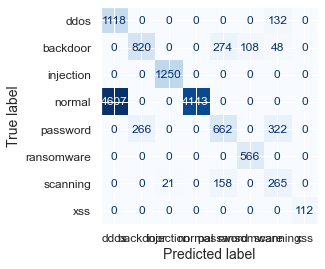

In [28]:
# matrix de confusão. Apenas do teste
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels,
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## KNeighborsClassifier

In [29]:
from sklearn.feature_selection import SelectFromModel

pipeline_knn = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', KNeighborsClassifier())
])

param_grid_KNN = {
                'feature_selection__max_features': [1,2,3],
                'classificador__n_neighbors': [1, 3, 5, 7, 9],
                'classificador__metric': ['euclidean', 'manhatan', 'chebyshev', 'minkowski']}

grid_search = GridSearchCV(pipeline_knn, param_grid=param_grid_KNN, cv=5, n_jobs=-1, refit=True)

In [30]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['light_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__metric': ['euclidean', 'manhatan',
                                                   'chebyshev', 'minkowski'],
                         'classificador__n_neighbors': [1, 3, 5, 7, 9],
                         'feature_selection__max_features': [1, 2, 3]})

In [31]:
X_train.head(3)

,motion_status,light_status,hour,minute,second,day
595,1,on,21,5,24,25
49064,0,off,12,43,7,31
16821,0,off,8,18,59,25


In [32]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__metric': 'euclidean', 'classificador__n_neighbors': 9, 'feature_selection__max_features': 2}


In [33]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.96932 +- 0.00564


In [34]:
y_pred = grid_search.predict(X_test)

In [35]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       0.85      0.74      0.79      1250
           5       1.00      1.00      1.00       566
           6       0.47      0.64      0.54       444
           7       1.00      1.00      1.00       112

    accuracy                           0.97     14872
   macro avg       0.92      0.92      0.92     14872
weighted avg       0.97      0.97      0.97     14872



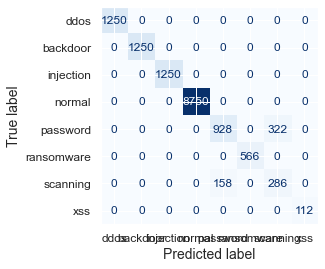

In [36]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels,
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Gradient Boosting Master

In [37]:
pipeline_gbm = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', GradientBoostingClassifier())
])

In [38]:
param_grid_GBM = {
    'feature_selection__max_features': [1,2,3],
    'classificador__learning_rate': [0.1, 0.05],
    'classificador__n_estimators': [50, 100],
    'classificador__max_depth': [2, 3],
    'classificador__min_samples_split': [2, 4],
    'classificador__min_samples_leaf': [1, 2],
    'classificador__max_features': ['auto', 'sqrt'],
    'classificador__subsample': [0.8, 1.0]}

grid_search = GridSearchCV(pipeline_gbm, param_grid=param_grid_GBM, cv=5, n_jobs=-1, refit=True)

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['light_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        GradientBoosti...r())]),
             n_jobs=-1,
             param_grid={'classificador__learning_rate': [0.1, 0.05],
                         'classificador__max_depth': [2, 3],
                         'classificador__max_features': ['auto', 'sqrt'],
                         'classificador__min_samples_leaf': [1, 2],
                         'classificador__min_samples_split': [2, 4],
                         'classificador__n_estimators': [50, 100],
                         'classificador__subsample': [0.8, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [40]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__learning_rate': 0.1, 'classificador__max_depth': 2, 'classificador__max_features': 'auto', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'classificador__n_estimators': 50, 'classificador__subsample': 0.8, 'feature_selection__max_features': 2}


In [41]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.97602 +- 0.00099


In [42]:
y_pred = grid_search.predict(X_test)

In [43]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       0.80      0.93      0.86      1250
           5       1.00      1.00      1.00       566
           6       0.66      0.35      0.46       444
           7       1.00      1.00      1.00       112

    accuracy                           0.98     14872
   macro avg       0.93      0.91      0.92     14872
weighted avg       0.97      0.98      0.97     14872



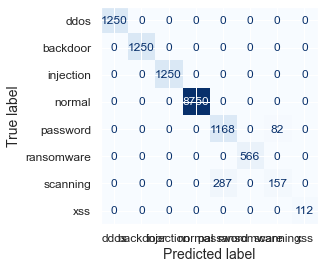

In [44]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels,
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Nayve Bayes BernoulliNB

In [45]:
pipeline_nb = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', BernoulliNB())
])

param_grid_NB = {
    'feature_selection__max_features': [1,2,3],
    'classificador__alpha': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(pipeline_nb, param_grid=param_grid_NB, cv=5, n_jobs=-1, refit=True)

In [46]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['light_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'classificador__alpha': [0.1, 0.5, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [47]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__alpha': 0.1, 'feature_selection__max_features': 2}


In [48]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.67240 +- 0.00003


In [49]:
y_pred = grid_search.predict(X_test)

In [50]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1250
           1       0.00      0.00      0.00      1250
           2       0.61      1.00      0.76      1250
           3       0.68      1.00      0.81      8750
           4       0.00      0.00      0.00      1250
           5       0.00      0.00      0.00       566
           6       0.00      0.00      0.00       444
           7       0.00      0.00      0.00       112

    accuracy                           0.67     14872
   macro avg       0.16      0.25      0.20     14872
weighted avg       0.45      0.67      0.54     14872



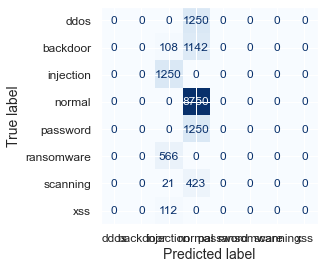

In [51]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels,
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Linear Discriminant Analysis

In [52]:
pipeline_lda = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LinearDiscriminantAnalysis())
])

param_grid_LDA = {
    'feature_selection__max_features': [1,2,3],
    'classificador__solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(pipeline_lda, param_grid=param_grid_LDA, cv=5, n_jobs=-1, refit=True)

In [53]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['light_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'classificador__solver': ['svd', 'lsqr', 'eigen'],
                         'feature_selection__max_features': [1, 2, 3]})

In [54]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__solver': 'svd', 'feature_selection__max_features': 2}


In [55]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.61967 +- 0.00076


In [56]:
y_pred = grid_search.predict(X_test)

In [57]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1250
           1       0.79      0.39      0.53      1250
           2       0.00      0.00      0.00      1250
           3       0.62      1.00      0.76      8750
           4       0.00      0.00      0.00      1250
           5       0.00      0.00      0.00       566
           6       0.00      0.00      0.00       444
           7       0.00      0.00      0.00       112

    accuracy                           0.62     14872
   macro avg       0.18      0.17      0.16     14872
weighted avg       0.43      0.62      0.49     14872



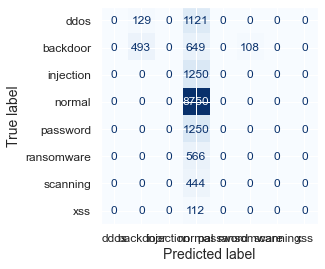

In [58]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels,
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine DecisionTreeClassifier

In [59]:
pipeline_dtc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', DecisionTreeClassifier())
])

param_grid_DTC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__max_depth': [2, 4, 6],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__class_weight': [None, 'balanced']}

grid_search = GridSearchCV(pipeline_dtc, param_grid=param_grid_DTC, cv=5, n_jobs=-1, refit=True)

In [60]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['light_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__class_weight': [None, 'balanced'],
                         'classificador__criterion': ['gini', 'entropy'],
                         'classificador__max_depth': [2, 4, 6],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'feature_selection__max_features': [1, 2, 3]})

In [61]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__class_weight': None, 'classificador__criterion': 'entropy', 'classificador__max_depth': 6, 'classificador__max_features': 'log2', 'classificador__min_samples_leaf': 4, 'classificador__min_samples_split': 2, 'feature_selection__max_features': 2}


In [62]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.97496 +- 0.00086


In [63]:
y_pred = grid_search.predict(X_test)

In [64]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       0.80      0.93      0.86      1250
           5       1.00      1.00      1.00       566
           6       0.66      0.35      0.46       444
           7       1.00      1.00      1.00       112

    accuracy                           0.98     14872
   macro avg       0.93      0.91      0.92     14872
weighted avg       0.97      0.98      0.97     14872



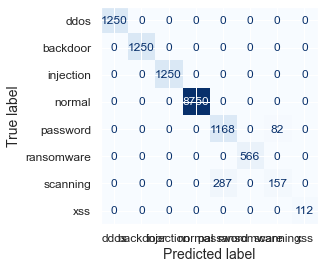

In [65]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels,
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine RandomForestClassifier

In [66]:
pipeline_rfc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', RandomForestClassifier())
])

param_grid_RFC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__n_estimators': [100, 300, 500],
    'classificador__max_depth': [3, 5, 7],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__bootstrap': [True, False]}

grid_search = GridSearchCV(pipeline_rfc, param_grid=param_grid_RFC, cv=5, n_jobs=-1, refit=True)

In [67]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['light_status'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__bootstrap': [True, False],
                         'classificador__max_depth': [3, 5, 7],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'classificador__n_estimators': [100, 300, 500],
                         'feature_selection__max_features': [1, 2, 3]})

In [68]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__bootstrap': True, 'classificador__max_depth': 7, 'classificador__max_features': 'sqrt', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'classificador__n_estimators': 100, 'feature_selection__max_features': 2}


In [69]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.97541 +- 0.00063


In [70]:
y_pred = grid_search.predict(X_test)

In [71]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       0.77      1.00      0.87      1250
           5       1.00      1.00      1.00       566
           6       1.00      0.16      0.28       444
           7       1.00      1.00      1.00       112

    accuracy                           0.98     14872
   macro avg       0.97      0.90      0.89     14872
weighted avg       0.98      0.98      0.97     14872



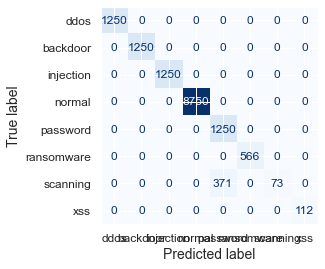

In [72]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels,
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()